# PISA 2012 exam´s data exploration

## Preliminary Wrangling

> This dataset contains information about around 500,000 students (15-16 years old) who made the PISA exam in 2012. The dateset provides a total of 635 variables, where it is possible to find the results of the exam in Mathematics, Science and Reading and a lot of further information about the personal background and characteristics of the students.

In [6]:
# Firstly, we import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import dexplot as dxp
%matplotlib inline

##### 1. We are going to read the csv file we have chosen, the one regarding to the PISA test of 2012.

In [7]:
# Load the dataset
pisa = pd.read_csv('pisa2012.csv',sep=',', encoding='latin-1', index_col=0, dtype='unicode')
pisa.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
1,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00001,10,1,02,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00002,10,1,02,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
3,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00003,9,1,09,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00004,9,1,08,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00005,9,1,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [8]:
pisa.shape 

(485490, 635)

##### 2. Main features of interest

> The second step will be to explore the data and take the information that will be useful for the exploratory analysis. As our main goal will be to analyze the overall results of the three before mentioned subjects and the factors that more influence them, we will choose some specific variables.

In [9]:
pisac = pisa.iloc[:,np.r_[0,3,9,10,11,38,41,42,49,50,51,52,71,178,283,284,285,286,426,438,500,501,502,503,504,540,541,542,543,544,545,546,547,548,549]]

> As in total there are 635 variables in the original dataset, we are going to select just those that we think are going to be useful for the analysis so we are going to take just the variables related to Mathematics, Science, Reading and to the social background.

In [10]:
pisac.head()

,CNT,OECD,ST03Q01,ST03Q02,ST04Q01,ST20Q01,ST21Q01,ST25Q01,ST26Q07,ST26Q08,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
1,Albania,Non-OECD,02,1996,Female,Country of test,NaN,Language of the test,No,Yes,...,249.5762,254.342,406.8496,175.7053,218.5981,341.7009,408.84,348.2283,367.8105,392.9877
2,Albania,Non-OECD,02,1996,Female,Country of test,NaN,Language of the test,Yes,Yes,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
3,Albania,Non-OECD,09,1996,Female,Country of test,NaN,Language of the test,Yes,Yes,...,401.21,404.3872,387.7067,431.3938,401.21,499.6643,428.7952,492.2044,512.7191,499.6643
4,Albania,Non-OECD,08,1996,Female,Country of test,NaN,Language of the test,Yes,Yes,...,547.363,481.4353,461.5776,425.0393,471.9036,438.6796,481.574,448.937,474.1141,426.5573
5,Albania,Non-OECD,10,1996,Female,Country of test,NaN,Language of the test,Yes,Yes,...,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.774,372.7527,403.5248,422.1746


> We are going to rename the column names so we can understand the data.

In [11]:
pisac = pisac.rename(columns={'CNT':'country','OECD':'oecd','ST03Q01':'birth_month','ST03Q02':'birth_year','ST04Q01':'gender','ST20Q01':'cntry_of_birth','ST21Q01':'arrival_age', 'ST25Q01':'home_lang','ST26Q07':'poss_lit','ST26Q08':'poss_poet','ST26Q09':'poss_art','ST26Q10':'poss_tb','ST29Q06':'math_int','ST72Q01':'class_size','IC01Q01':'pc_home','IC01Q02':'laptop_home','IC01Q03':'tablet_home','IC01Q04':'internet_home','DISCLIMA':'disc_clim','HISCED':'par_ed','PV1MATH':'pl_vl1','PV2MATH':'pl_vl2','PV3MATH':'pl_vl3','PV4MATH':'pl_vl4','PV5MATH':'pl_vl5'})

In [12]:
pisac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 35 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country         485490 non-null  object
 1   oecd            485490 non-null  object
 2   birth_month     485490 non-null  object
 3   birth_year      485490 non-null  object
 4   gender          485490 non-null  object
 5   cntry_of_birth  476363 non-null  object
 6   arrival_age     32728 non-null   object
 7   home_lang       465496 non-null  object
 8   poss_lit        465860 non-null  object
 9   poss_poet       467094 non-null  object
 10  poss_art        467249 non-null  object
 11  poss_tb         471242 non-null  object
 12  math_int        314746 non-null  object
 13  class_size      294163 non-null  object
 14  pc_home         296977 non-null  object
 15  laptop_home     297068 non-null  object
 16  tablet_home     295602 non-null  object
 17  internet_home   297305 non-nu

In [13]:
pisac.head()

,country,oecd,birth_month,birth_year,gender,cntry_of_birth,arrival_age,home_lang,poss_lit,poss_poet,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
1,Albania,Non-OECD,02,1996,Female,Country of test,NaN,Language of the test,No,Yes,...,249.5762,254.342,406.8496,175.7053,218.5981,341.7009,408.84,348.2283,367.8105,392.9877
2,Albania,Non-OECD,02,1996,Female,Country of test,NaN,Language of the test,Yes,Yes,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
3,Albania,Non-OECD,09,1996,Female,Country of test,NaN,Language of the test,Yes,Yes,...,401.21,404.3872,387.7067,431.3938,401.21,499.6643,428.7952,492.2044,512.7191,499.6643
4,Albania,Non-OECD,08,1996,Female,Country of test,NaN,Language of the test,Yes,Yes,...,547.363,481.4353,461.5776,425.0393,471.9036,438.6796,481.574,448.937,474.1141,426.5573
5,Albania,Non-OECD,10,1996,Female,Country of test,NaN,Language of the test,Yes,Yes,...,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.774,372.7527,403.5248,422.1746


In [14]:
pisac.oecd.value_counts()

OECD        295416
Non-OECD    190074
Name: oecd, dtype: int64

##### We have decided to make the analyisis of Non-OECD countries

> We have decided to make the analysis of the non-OECD countries due to the willingness to know more about countries that do not belong to Europe. Another reason is the data size, which otherwise would be not possible to handle with the available technical means.

In [15]:
pisac=pisac[pisac['oecd']=='Non-OECD']

In [16]:
pisac.oecd.value_counts()

Non-OECD    190074
Name: oecd, dtype: int64

In [17]:
pisa_noecd = pisac.country.value_counts()

In [18]:
df_pisa_noecd = pd.DataFrame(pisa_noecd).reset_index()

In [19]:
df_pisa_noecd = df_pisa_noecd[df_pisa_noecd['country']>6000]

> Due to technical issues with the size of data, we will reduce the data by analyzing countries that have more than 6000 students. This way, the data will have less than 80,000 rows, which will be affordable for our device.

In [20]:
df_pisa_noecd

,index,country
0,Brazil,19204
1,United Arab Emirates,11500
2,Qatar,10966
3,Colombia,9073
4,Jordan,7038
5,Thailand,6606
6,Chinese Taipei,6046
7,Peru,6035


In [21]:
df_pisa_noecd = df_pisa_noecd.rename(columns={'index':'country', 'country':'stud'})

In [22]:
df_pisa_noecd.head(2)

,country,stud
0,Brazil,19204
1,United Arab Emirates,11500


In [23]:
df_pisa = pd.merge(pisac, df_pisa_noecd,on='country', how='inner').drop('stud', axis=1)

In [24]:
df_pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76468 entries, 0 to 76467
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         76468 non-null  object
 1   oecd            76468 non-null  object
 2   birth_month     76468 non-null  object
 3   birth_year      76468 non-null  object
 4   gender          76468 non-null  object
 5   cntry_of_birth  74844 non-null  object
 6   arrival_age     7708 non-null   object
 7   home_lang       73267 non-null  object
 8   poss_lit        72340 non-null  object
 9   poss_poet       72763 non-null  object
 10  poss_art        72411 non-null  object
 11  poss_tb         73317 non-null  object
 12  math_int        49089 non-null  object
 13  class_size      43251 non-null  object
 14  pc_home         12664 non-null  object
 15  laptop_home     12604 non-null  object
 16  tablet_home     12552 non-null  object
 17  internet_home   12573 non-null  object
 18  disc_c

In [25]:
df_pisa.sample(5)

,country,oecd,birth_month,birth_year,gender,cntry_of_birth,arrival_age,home_lang,poss_lit,poss_poet,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
18643,Brazil,Non-OECD,05,1996,Male,Country of test,NaN,Language of the test,No,No,...,284.6722,270.2372,358.4512,295.8995,291.8897,261.5069,286.6841,414.4349,338.9034,309.9963
33945,Colombia,Non-OECD,11,1996,Male,Country of test,NaN,Language of the test,No,No,...,508.5753,501.3578,563.1076,514.1889,523.8123,513.5584,510.7609,487.4487,480.9213,480.9213
4990,United Arab Emirates,Non-OECD,05,1996,Female,Country of test,NaN,Language of the test,No,Yes,...,471.9036,523.5337,479.0524,470.315,479.8467,484.6512,521.9508,458.5416,498.6386,460.4066
8858,United Arab Emirates,Non-OECD,09,1996,Female,Country of test,NaN,Language of the test,No,No,...,326.6243,344.8934,271.8169,279.76,286.9088,363.3346,370.7945,342.8198,305.5203,322.3051
40461,Jordan,Non-OECD,02,1996,Male,Country of test,NaN,Language of the test,No,No,...,278.4171,294.456,263.9821,250.349,266.3879,302.8161,299.0862,304.6811,329.8583,278.5714


> In order to be able to calculate the mean value, we are going to convert the plausible values from objetct to floats.

In [26]:
df_pisa['pl_vl1']= df_pisa['pl_vl1'].astype(float)
df_pisa['pl_vl2']= df_pisa['pl_vl2'].astype(float)
df_pisa['pl_vl3']= df_pisa['pl_vl3'].astype(float)
df_pisa['pl_vl4']= df_pisa['pl_vl4'].astype(float)
df_pisa['pl_vl5']= df_pisa['pl_vl5'].astype(float)

df_pisa['PV1READ']= df_pisa['PV1READ'].astype(float)
df_pisa['PV2READ']= df_pisa['PV2READ'].astype(float)
df_pisa['PV3READ']= df_pisa['PV3READ'].astype(float)
df_pisa['PV4READ']= df_pisa['PV4READ'].astype(float)
df_pisa['PV5READ']= df_pisa['PV5READ'].astype(float)

df_pisa['PV1SCIE']= df_pisa['PV1SCIE'].astype(float)
df_pisa['PV2SCIE']= df_pisa['PV2SCIE'].astype(float)
df_pisa['PV3SCIE']= df_pisa['PV3SCIE'].astype(float)
df_pisa['PV4SCIE']= df_pisa['PV4SCIE'].astype(float)
df_pisa['PV5SCIE']= df_pisa['PV5SCIE'].astype(float)

In [27]:
df_pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76468 entries, 0 to 76467
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         76468 non-null  object 
 1   oecd            76468 non-null  object 
 2   birth_month     76468 non-null  object 
 3   birth_year      76468 non-null  object 
 4   gender          76468 non-null  object 
 5   cntry_of_birth  74844 non-null  object 
 6   arrival_age     7708 non-null   object 
 7   home_lang       73267 non-null  object 
 8   poss_lit        72340 non-null  object 
 9   poss_poet       72763 non-null  object 
 10  poss_art        72411 non-null  object 
 11  poss_tb         73317 non-null  object 
 12  math_int        49089 non-null  object 
 13  class_size      43251 non-null  object 
 14  pc_home         12664 non-null  object 
 15  laptop_home     12604 non-null  object 
 16  tablet_home     12552 non-null  object 
 17  internet_home   12573 non-null 

> The next step will be to calculate the mean value for the five plausible values, so we make just one column out of five.

In [28]:
col1=df_pisa.iloc[:,20:25]
df_pisa['plv_meanmath']= col1.mean(axis=1)

col2=df_pisa.iloc[:,25:30]
df_pisa['plv_meanread']= col2.mean(axis=1)

col3=df_pisa.iloc[:,30:]
df_pisa['plv_meanscie']= col3.mean(axis=1)

In [29]:
df_pisa.head()

,country,oecd,birth_month,birth_year,gender,cntry_of_birth,arrival_age,home_lang,poss_lit,poss_poet,...,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,plv_meanmath,plv_meanread,plv_meanscie
0,United Arab Emirates,Non-OECD,08,1996,Male,Other country,4,Language of the test,Yes,Yes,...,310.3345,241.3672,397.2771,387.9523,375.8299,365.5725,351.5852,341.80558,288.36118,358.340537
1,United Arab Emirates,Non-OECD,06,1996,Male,Country of test,NaN,Language of the test,No,Yes,...,198.2226,243.1315,301.5106,267.0086,315.4979,289.3883,305.2406,246.77520,223.72442,278.449374
2,United Arab Emirates,Non-OECD,09,1996,Male,Country of test,NaN,Language of the test,No,No,...,251.0707,322.4439,293.7710,278.8512,200.5222,234.0918,327.3405,293.58934,265.02458,270.455803
3,United Arab Emirates,Non-OECD,12,1996,Male,Other country,0,Language of the test,NaN,NaN,...,214.1813,252.6746,329.2055,298.4334,281.6486,319.8806,318.9482,251.52670,209.36960,287.001800
4,United Arab Emirates,Non-OECD,03,1996,Male,Country of test,NaN,Language of the test,Yes,Yes,...,301.6735,249.5470,378.1611,405.2033,389.3510,408.0007,410.7982,303.17028,283.87030,368.364983


In [30]:
col_del=df_pisa.iloc[:,20:35]

In [31]:
df_pisa.drop(col_del,axis=1,inplace=True) # In order to drop the five columns corresponding the plausible values.

In [32]:
df_pisa.head() #To test of the five columns were dropped.

,country,oecd,birth_month,birth_year,gender,cntry_of_birth,arrival_age,home_lang,poss_lit,poss_poet,...,class_size,pc_home,laptop_home,tablet_home,internet_home,disc_clim,par_ed,plv_meanmath,plv_meanread,plv_meanscie
0,United Arab Emirates,Non-OECD,08,1996,Male,Other country,4,Language of the test,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,-0.53,"ISCED 5A, 6",341.80558,288.36118,358.340537
1,United Arab Emirates,Non-OECD,06,1996,Male,Country of test,NaN,Language of the test,No,Yes,...,35,NaN,NaN,NaN,NaN,-2.48,"ISCED 5A, 6",246.77520,223.72442,278.449374
2,United Arab Emirates,Non-OECD,09,1996,Male,Country of test,NaN,Language of the test,No,No,...,36,NaN,NaN,NaN,NaN,-1.2,ISCED 5B,293.58934,265.02458,270.455803
3,United Arab Emirates,Non-OECD,12,1996,Male,Other country,0,Language of the test,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"ISCED 3A, ISCED 4",251.52670,209.36960,287.001800
4,United Arab Emirates,Non-OECD,03,1996,Male,Country of test,NaN,Language of the test,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,-2.48,"ISCED 3A, ISCED 4",303.17028,283.87030,368.364983


In [33]:
df_pisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76468 entries, 0 to 76467
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         76468 non-null  object 
 1   oecd            76468 non-null  object 
 2   birth_month     76468 non-null  object 
 3   birth_year      76468 non-null  object 
 4   gender          76468 non-null  object 
 5   cntry_of_birth  74844 non-null  object 
 6   arrival_age     7708 non-null   object 
 7   home_lang       73267 non-null  object 
 8   poss_lit        72340 non-null  object 
 9   poss_poet       72763 non-null  object 
 10  poss_art        72411 non-null  object 
 11  poss_tb         73317 non-null  object 
 12  math_int        49089 non-null  object 
 13  class_size      43251 non-null  object 
 14  pc_home         12664 non-null  object 
 15  laptop_home     12604 non-null  object 
 16  tablet_home     12552 non-null  object 
 17  internet_home   12573 non-null 

##### The last wrangling step will be to create a new **csv** file in order to work and make visualizations with a smaller size file.

In [34]:
df_pisa.to_csv('pisa_noecd.csv', index=False)

In [35]:
df_pisa_noecd = pd.read_csv('pisa_noecd.csv',sep=',', encoding='latin-1', index_col=0, dtype='unicode').reset_index()

In [36]:
df_pisa_noecd.head(2)

,country,oecd,birth_month,birth_year,gender,cntry_of_birth,arrival_age,home_lang,poss_lit,poss_poet,...,class_size,pc_home,laptop_home,tablet_home,internet_home,disc_clim,par_ed,plv_meanmath,plv_meanread,plv_meanscie
0,United Arab Emirates,Non-OECD,08,1996,Male,Other country,4,Language of the test,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,-0.53,"ISCED 5A, 6",341.80558,288.36118,358.3405371428571
1,United Arab Emirates,Non-OECD,06,1996,Male,Country of test,NaN,Language of the test,No,Yes,...,35,NaN,NaN,NaN,NaN,-2.48,"ISCED 5A, 6",246.77519999999998,223.72442,278.4493742857143


In [37]:
df_pisa_noecd['plv_meanmath'] =df_pisa_noecd['plv_meanmath'].astype(float)
df_pisa_noecd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76468 entries, 0 to 76467
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         76468 non-null  object 
 1   oecd            76468 non-null  object 
 2   birth_month     76468 non-null  object 
 3   birth_year      76468 non-null  object 
 4   gender          76468 non-null  object 
 5   cntry_of_birth  74844 non-null  object 
 6   arrival_age     7708 non-null   object 
 7   home_lang       73267 non-null  object 
 8   poss_lit        72340 non-null  object 
 9   poss_poet       72763 non-null  object 
 10  poss_art        72411 non-null  object 
 11  poss_tb         73317 non-null  object 
 12  math_int        49089 non-null  object 
 13  class_size      43251 non-null  object 
 14  pc_home         12664 non-null  object 
 15  laptop_home     12604 non-null  object 
 16  tablet_home     12552 non-null  object 
 17  internet_home   12573 non-null 

In [38]:
df_pisa_noecd['plv_meanread']=df_pisa_noecd['plv_meanread'].astype(float)
df_pisa_noecd['plv_meanscie']=df_pisa_noecd['plv_meanscie'].astype(float)
df_pisa_noecd['birth_year']=df_pisa_noecd['birth_year'].astype(float)
df_pisa_noecd['birth_month']=df_pisa_noecd['birth_month'].astype(float)
df_pisa_noecd['class_size']=df_pisa_noecd['class_size'].astype(float)
df_pisa_noecd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76468 entries, 0 to 76467
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         76468 non-null  object 
 1   oecd            76468 non-null  object 
 2   birth_month     76468 non-null  float64
 3   birth_year      76468 non-null  float64
 4   gender          76468 non-null  object 
 5   cntry_of_birth  74844 non-null  object 
 6   arrival_age     7708 non-null   object 
 7   home_lang       73267 non-null  object 
 8   poss_lit        72340 non-null  object 
 9   poss_poet       72763 non-null  object 
 10  poss_art        72411 non-null  object 
 11  poss_tb         73317 non-null  object 
 12  math_int        49089 non-null  object 
 13  class_size      43251 non-null  float64
 14  pc_home         12664 non-null  object 
 15  laptop_home     12604 non-null  object 
 16  tablet_home     12552 non-null  object 
 17  internet_home   12573 non-null 

In [39]:
df_pisa_noecd['overall_plv'] = df_pisa_noecd.iloc[:,20:23].mean(axis=1)
df_pisa_noecd.head(2)

,country,oecd,birth_month,birth_year,gender,cntry_of_birth,arrival_age,home_lang,poss_lit,poss_poet,...,pc_home,laptop_home,tablet_home,internet_home,disc_clim,par_ed,plv_meanmath,plv_meanread,plv_meanscie,overall_plv
0,United Arab Emirates,Non-OECD,8.0,1996.0,Male,Other country,4,Language of the test,Yes,Yes,...,NaN,NaN,NaN,NaN,-0.53,"ISCED 5A, 6",341.80558,288.36118,358.340537,329.502432
1,United Arab Emirates,Non-OECD,6.0,1996.0,Male,Country of test,NaN,Language of the test,No,Yes,...,NaN,NaN,NaN,NaN,-2.48,"ISCED 5A, 6",246.77520,223.72442,278.449374,249.649665


In [40]:
df_pisa_noecd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76468 entries, 0 to 76467
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         76468 non-null  object 
 1   oecd            76468 non-null  object 
 2   birth_month     76468 non-null  float64
 3   birth_year      76468 non-null  float64
 4   gender          76468 non-null  object 
 5   cntry_of_birth  74844 non-null  object 
 6   arrival_age     7708 non-null   object 
 7   home_lang       73267 non-null  object 
 8   poss_lit        72340 non-null  object 
 9   poss_poet       72763 non-null  object 
 10  poss_art        72411 non-null  object 
 11  poss_tb         73317 non-null  object 
 12  math_int        49089 non-null  object 
 13  class_size      43251 non-null  float64
 14  pc_home         12664 non-null  object 
 15  laptop_home     12604 non-null  object 
 16  tablet_home     12552 non-null  object 
 17  internet_home   12573 non-null 

In [41]:
df_scores=df_pisa_noecd.iloc[:,20:]
df_scores.describe()

,plv_meanmath,plv_meanread,plv_meanscie,overall_plv
count,76468.000000,76468.000000,76468.000000,76468.000000
mean,407.245761,418.275098,415.908613,413.809824
std,98.007847,95.359840,90.492484,92.003245
min,112.408480,6.445400,85.251291,78.853577
25%,339.235080,353.789660,352.238781,349.674766
50%,393.215440,416.699040,408.813023,405.742520
75%,461.060900,482.388500,473.320470,470.778377
max,863.304240,765.560040,769.841146,796.320122


# EXPLORATORY ANALYSIS

> Below we will draw a pie chart in order to see the male and female percentages

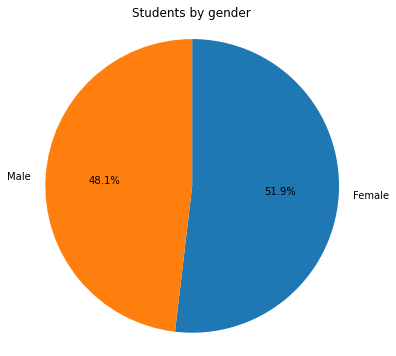

In [42]:
sort_count = df_pisa_noecd['gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sort_count, labels = sort_count.index, autopct='%.1f%%', startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Students by gender');

> Looking at the pie chart, we can see both genders are equivalently represented in this data, so the gender analysis will be made with consistent data.

In [43]:
df_pisa_noecd.gender.value_counts() #Test

Female    39659
Male      36809
Name: gender, dtype: int64

> Next, we will visualize the results by country and by gender.

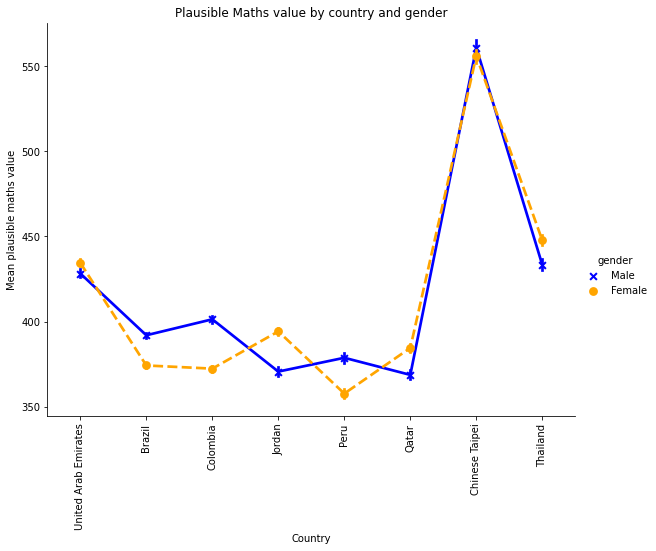

In [44]:
g=sb.catplot(x="country", y="plv_meanmath", hue="gender",palette={"Male": "b", "Female": "orange"}, markers=["x", "o"], linestyles=["-", "--"],kind="point", data=df_pisa_noecd, height=6, aspect=8/6)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Mean plausible maths value')
plt.title('Plausible Maths value by country and gender')
plt.show()

> Regarding the plot above we can determine that the results in maths are independent of the gender.In some countries women have better marks than men and in other men are better.

In [45]:
df_pisa_noecd.query("gender=='Female'")['plv_meanmath'].mean(), df_pisa_noecd.query("gender=='Male'")['plv_meanmath'].mean()

(405.86232087395103, 408.7363173370641)

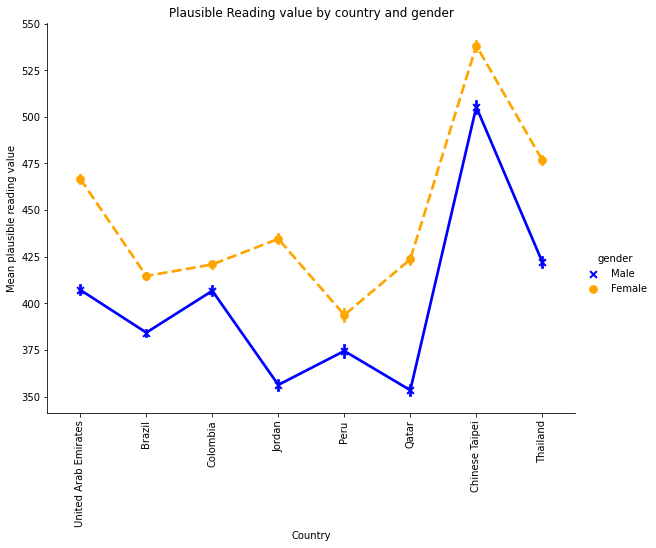

In [46]:
g=sb.catplot(x="country", y="plv_meanread", hue="gender",palette={"Male": "b", "Female": "orange"}, markers=["x", "o"], linestyles=["-", "--"], kind="point", data=df_pisa_noecd, height=6, aspect=8/6)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Mean plausible reading value')
plt.title('Plausible Reading value by country and gender')
plt.show()

> In the plot above it is pretty clear that female are better than men at reading in all the countries.

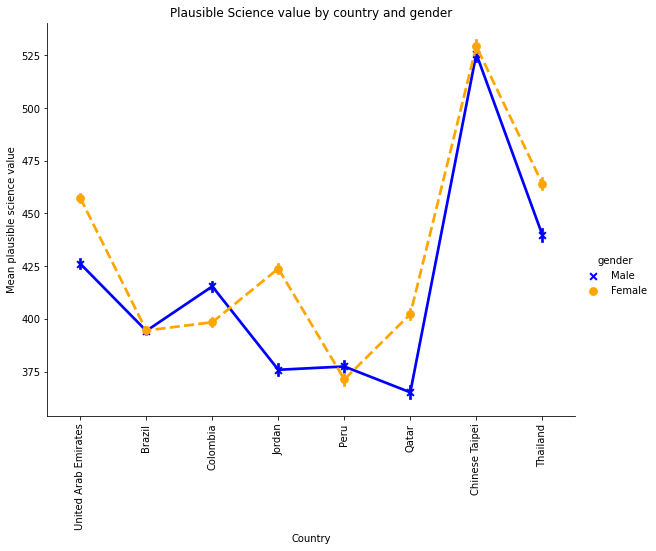

In [47]:
g=sb.catplot(x="country", y="plv_meanscie", hue="gender",palette={"Male": "b", "Female": "orange"},markers=["x", "o"], linestyles=["-", "--"],kind="point", data=df_pisa_noecd, height=6, aspect=8/6)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Mean plausible science value')
plt.title('Plausible Science value by country and gender')
plt.show()

Lastly, we can see than women are generally better than men in science execpt in Colombia and in a lower grade in Pero, where the marks are really similar.

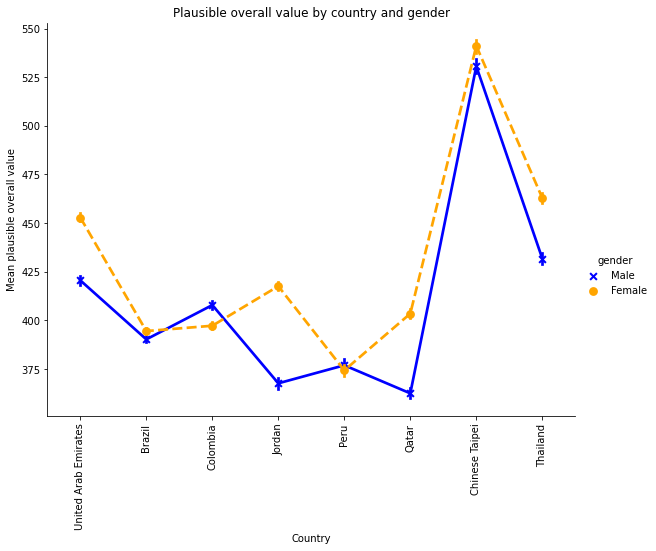

In [48]:
g=sb.catplot(x="country", y="overall_plv", hue="gender",palette={"Male": "b", "Female": "orange"},markers=["x", "o"],linestyles=["-", "--"], kind="point", data=df_pisa_noecd, height=6, aspect=8/6)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Mean plausible overall value')
plt.title('Plausible overall value by country and gender')
plt.show()

To sum up, we can say that female have better overall results in every country except in Colombia and Peru.

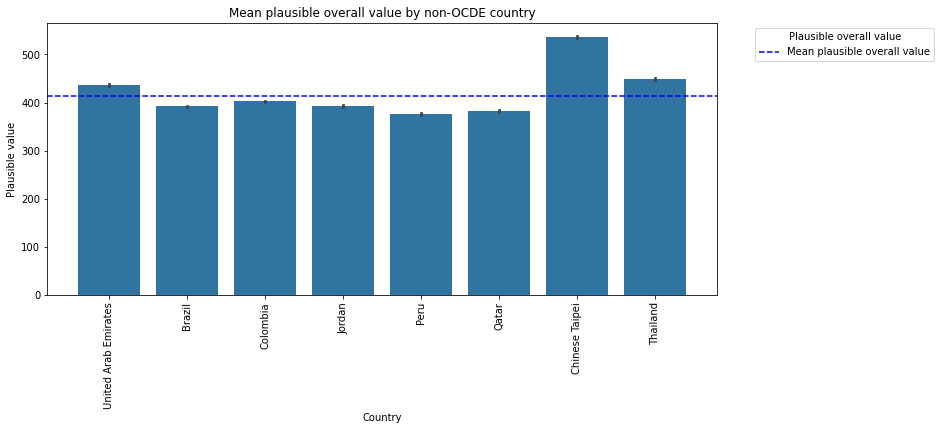

In [49]:
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
color=sb.color_palette()[0]
plt.figure(figsize=(12,5))
fontP.set_size('medium')
df_pisa1996=df_pisa_noecd
ax = sb.barplot(data = df_pisa1996, x = 'country', y = 'overall_plv',color=color)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Plausible value')
mean_plv = df_pisa_noecd['overall_plv'].mean()
plt.axhline(y = mean_plv, color = 'b', linestyle = '--') 
mean_line1996= ax.plot(mean_plv, label='Mean plausible overall value', linestyle='--', color='b')
plt.title('Mean plausible overall value by non-OCDE country')
ax.legend(title = 'Plausible overall value', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

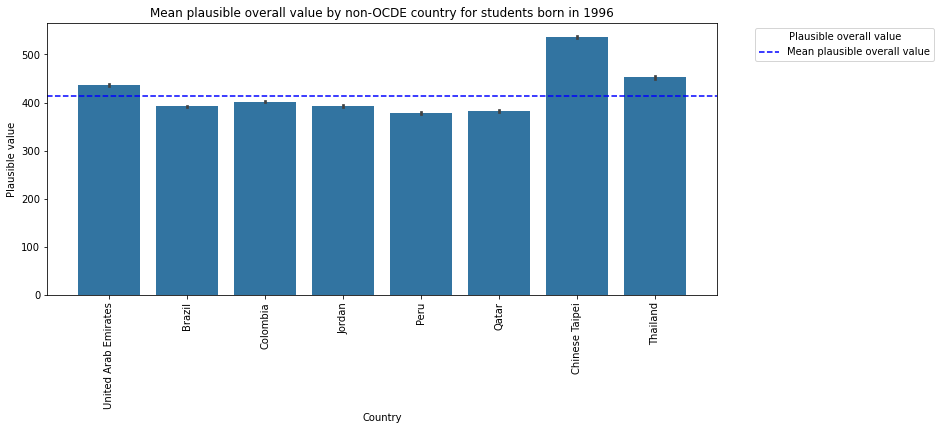

In [50]:

fontP = FontProperties()
color=sb.color_palette()[0]
plt.figure(figsize=(12,5))
fontP.set_size('medium')
df_pisa1996=df_pisa_noecd.query("birth_year=='1996'")
ax = sb.barplot(data = df_pisa1996, x = 'country', y = 'overall_plv',color=color)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Plausible value')
mean_plv1996 = df_pisa1996['overall_plv'].mean()
plt.axhline(y = mean_plv1996, color = 'b', linestyle = '--') 
mean_line1996= ax.plot(mean_plv1996, label='Mean plausible overall value', linestyle='--', color='b')
plt.title('Mean plausible overall value by non-OCDE country for students born in 1996')
ax.legend(title = 'Plausible overall value', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

> We have made a barplot with the plausible values for the students born in 1996.

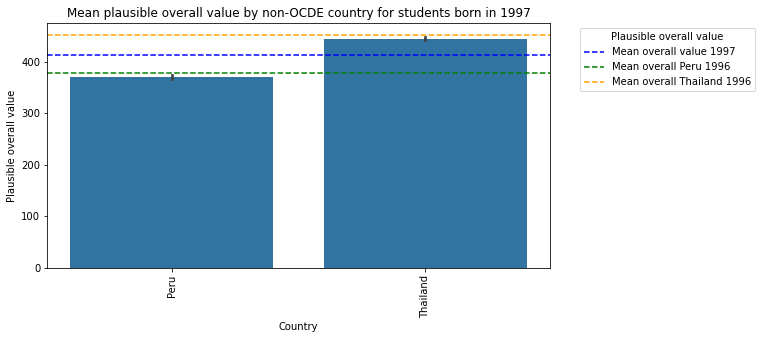

In [51]:
plt.figure(figsize=(9,4.5))
color=sb.color_palette()[0]
fontP.set_size('medium')
df_pisa1997=df_pisa_noecd.query("birth_year=='1997'")
ax = sb.barplot(data = df_pisa1997, x = 'country', y = 'overall_plv',color=color)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Plausible overall value')
mean_plv1997 = df_pisa1997['overall_plv'].mean()
mean_peru96 = df_pisa1996.query("country=='Peru'").overall_plv.mean()
mean_thai96 = df_pisa1996.query("country=='Thailand'").overall_plv.mean()
plt.axhline(y = mean_plv1997, color = 'b', linestyle = '--')
plt.axhline(y = mean_peru96, color = 'g', linestyle = '--')
plt.axhline(y = mean_thai96, color = 'orange', linestyle = '--')
mean_line97= ax.plot(mean_plv1997, label='Mean overall value 1997', linestyle='--', color='b')
mean_lp97= ax.plot(mean_peru96, label='Mean overall Peru 1996', linestyle='--', color='g')
mean_lt97= ax.plot(mean_thai96, label='Mean overall Thailand 1996', linestyle='--', color='orange')
plt.title('Mean plausible overall value by non-OCDE country for students born in 1997')
ax.legend(title = 'Plausible overall value', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

> In the barplot above we can see the mean plausible values for the students born in 1997. As we can see, there are only students from Peru and Thailand. Additionally, we have placed dashed lines to compare the mean plausible values of the students born in 1996 and in 1997. As we can just compare Peru and Thailand, we compare the students that were born in 1996 and 1997 in this both countries. As we can see, the mean overall plausible values are higher for the students that are older, those born in 1996.

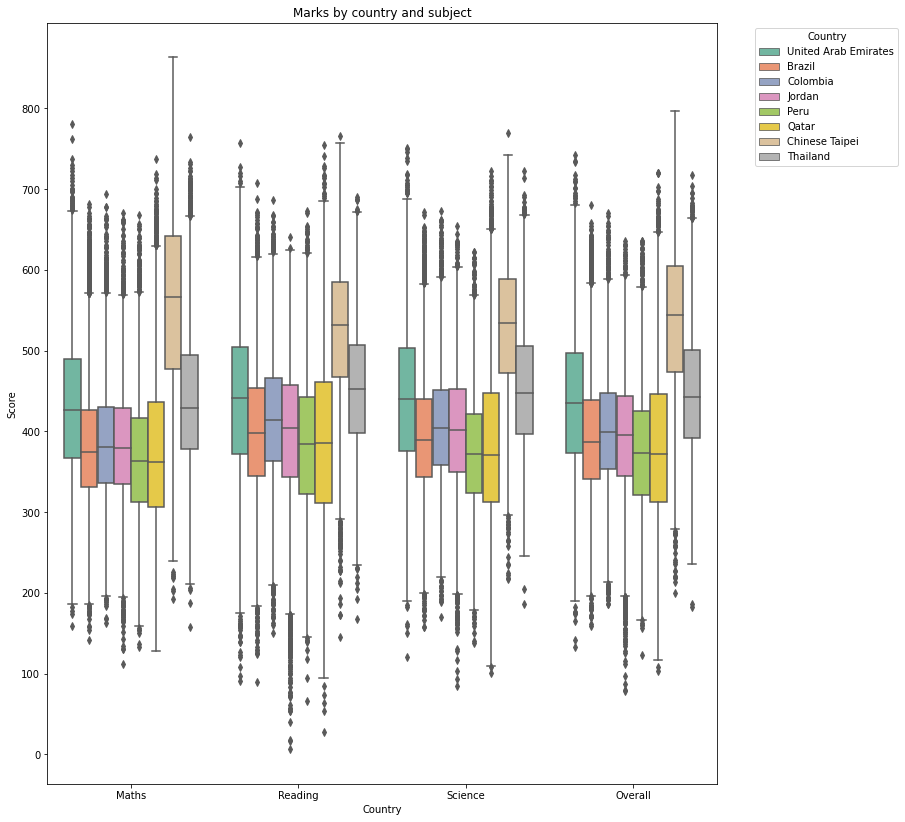

In [52]:
df_all = pd.melt(df_pisa_noecd, id_vars=['country', 'gender', 'birth_year'], value_vars=['plv_meanmath','plv_meanread','plv_meanscie','overall_plv'], var_name="Country", value_name='Score')
df_all['Country'] = df_all['Country'].replace('overall_plv', 'Overall').replace('plv_meanmath','Maths').replace('plv_meanread','Reading').replace('plv_meanscie','Science')

plt.figure(figsize=[12, 14]);
ax=sb.boxplot(x = df_all['Country'], y = df_all['Score'], hue=df_all['country'], palette = sb.color_palette('Set2'))
ax.legend(title = 'Country', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.title('Marks by country and subject');
y_ticks = np.arange(0, 850, 100)
plt.yticks(y_ticks, y_ticks);

> With the boxplot above we can compare the overall results and for each subjet between all the countries. As we can see Chinese Tapei becomes the best scores in all the subjects and Qatar the worst. 

In [53]:
df_pisa_noecd['disc_clim'] = df_pisa_noecd['disc_clim'].astype(float)

In [54]:
limx1=df_pisa_noecd['disc_clim'].min()
limx2=df_pisa_noecd['disc_clim'].max()

limx1,limx2

(-2.48, 1.85)

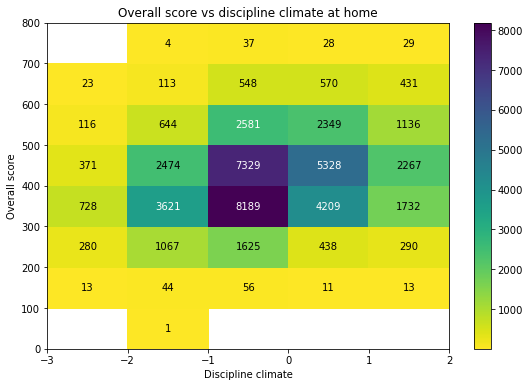

In [55]:
bins_x = np.arange(-3, 2.5, 1)
bins_y = np.arange(0, 850, 100)
plt.figure(figsize=(9,6))
ax=plt.hist2d(data = df_pisa_noecd, x = 'disc_clim', y = 'overall_plv', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Discipline climate')
plt.ylabel('Overall score')
plt.title('Overall score vs discipline climate at home')

amount = ax[0]
for i in range(amount.shape[0]):
    for j in range(amount.shape[1]):
        a = amount[i,j]
        if a >= 2500: 
            plt.text(bins_x[i]+0.5, bins_y[j]+50, int(a),
                     ha = 'center', va = 'center', color = 'white')
        elif a > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+50, int(a),
                     ha = 'center', va = 'center', color = 'black')

> Looking at the heat map above it is possible to see that there is a strong correlation we can appreciate the stron correlation between the students with better marks and the discipline climate. The students amount with good scores decreases with the discipline climate at home and increases with it.

In [56]:
def barPerc(df,xVar,hueVar,ax):
    
    numHues=len(df.dropna(subset=[hueVar])[hueVar].unique())
    numX=len(df.dropna(subset=[xVar])[xVar].unique())
    
    bars = ax.patches
    for ind in range(numX):
        
        hueBars=bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])

        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height() + 40,
                    '{0:.0%}'.format(bar.get_height()/total), ha="center")

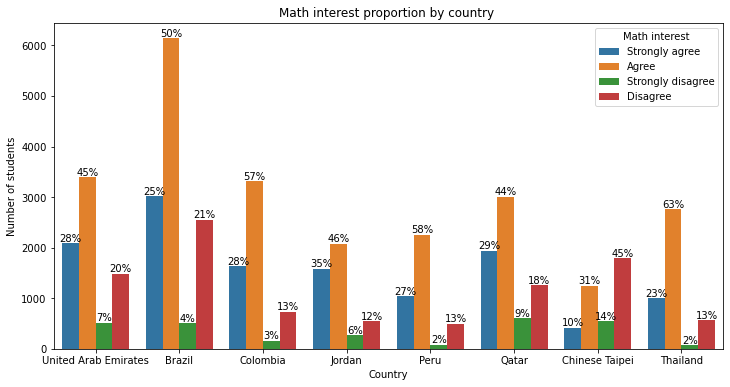

In [57]:
plt.figure(figsize=(12,6))
ax = sb.countplot(x ='country', hue = "math_int", data = df_pisa_noecd)
ax.set_ylabel('Number of students')
ax.set_xlabel('Country')
ax.legend(title='Math interest')
plt.title('Math interest proportion by country ')
barPerc(df_pisa_noecd,'country','math_int',ax)

> In the bar plot above there are couple of curious facts that caught our attention. The first one is tha the Chinese Taipei is the country with the highest rate with *disagree* reagarding the math interest. However they are the country with the highest scores (see bar plot below). On the other hand, there is Jordan, which has the highes rate regarding *strongly agree* and *agree* percentages but the corresponding scores are the lowest of all the analyzed countries.

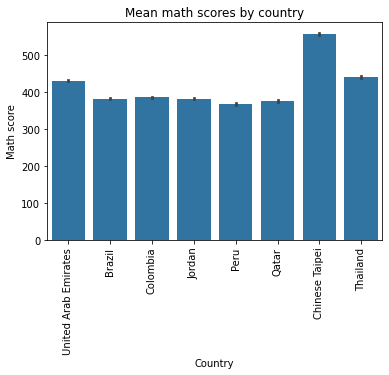

In [58]:
fontP = FontProperties()
color=sb.color_palette()[0]
plt.figure(figsize=(6,4))
fontP.set_size('medium')
ax = sb.barplot(data = df_pisa_noecd, x = 'country', y = 'plv_meanmath',color=color)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Math score')
plt.title('Mean math scores by country')
plt.show()

In [59]:
df_pisa_noecd['home_lang'].value_counts()

Language of the test    60843
Other language          12424
Name: home_lang, dtype: int64

In [60]:
non_null_lang=sum(df_pisa_noecd['home_lang'].notnull())
lang_of_test=df_pisa_noecd[df_pisa_noecd['home_lang']=='Language of the test'].shape[0]/non_null_lang
other_language= df_pisa_noecd[df_pisa_noecd['home_lang']=='Other language'].shape[0]/non_null_lang
lang_of_test, other_language # Percentages of students regarding their home language

(0.8304284329916607, 0.16957156700833936)

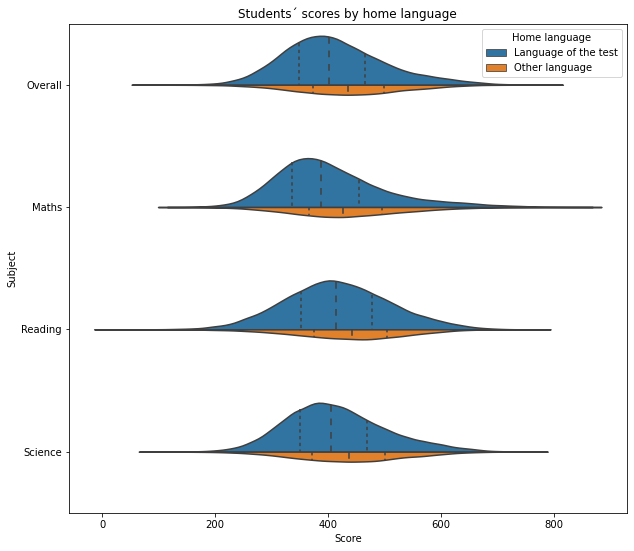

In [61]:
df_lang = pd.melt(df_pisa_noecd, id_vars=['gender', 'birth_year', 'country', 'home_lang'],value_vars=['overall_plv','plv_meanmath','plv_meanread','plv_meanscie'], var_name="Subject", value_name='Score')
df_lang['Subject'] = df_lang['Subject'].replace('overall_plv', 'Overall').replace('plv_meanmath','Maths').replace('plv_meanread','Reading').replace('plv_meanscie','Science')
color = sb.color_palette()

plt.figure(figsize = [10, 9])
ax = sb.violinplot(x = 'Score', y='Subject', hue='home_lang',data=df_lang, palette=color, split=True,scale="count", inner="quartile");

x_ticks = np.arange(0, 800 + 1, 100)
ax.legend(title = 'Home language')
plt.title("Students´ scores by home language");

> As the violin plot above shows, the students who do not speak the language of the test at home have better results in all the subjects than those that they do. We also have to mention that the sample of students who speak other language at home is much smaller than the one of the students who speak the exam language at home.

In [62]:
df_pisa_noecd['class_size'].describe()

count    43251.000000
mean        31.125408
std          9.488073
min          0.000000
25%         25.000000
50%         30.000000
75%         38.000000
max        100.000000
Name: class_size, dtype: float64

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


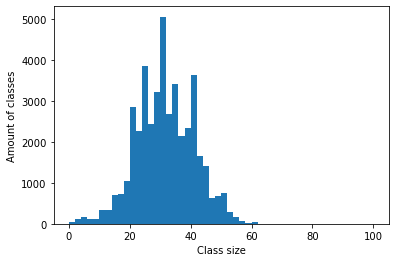

In [63]:
bin_edges = np.arange(0, df_pisa_noecd['class_size'].max()+1, 2)
sb.distplot(df_pisa_noecd['class_size'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1})
plt.xlabel('Class size')
plt.ylabel('Amount of classes');

In [64]:
df_pisa_class= df_pisa_noecd[(df_pisa_noecd['class_size']>14) & (df_pisa_noecd['class_size']<46)]
df_pisa_class['class_size'].describe()

count    39157.000000
mean        30.680032
std          7.497652
min         15.000000
25%         25.000000
50%         30.000000
75%         37.000000
max         45.000000
Name: class_size, dtype: float64

> We have created a new dataframe just with **class sizes** between 14 and 46 students, which is are reasonable values being a bit tolerant, taking into account that, for example, in Europe normally are between 20 and 35 students per class. As we do not know how does it work in the non-oecd countries we have broadened both the higher and the lower limit. As it is possible to see, the mean value is almost the same as with the whole old dataframe (df_pisa_noecd) but the standard deviation has decreased by two points, so now we will work with more consistente *class_size* variable values.

C:\Users\Xabi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


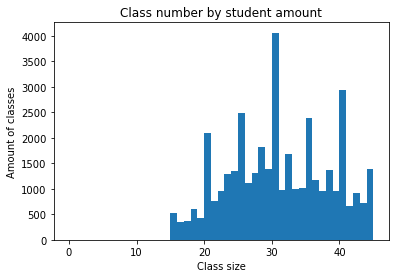

In [65]:
bin_edges = np.arange(0, df_pisa_class['class_size'].max()+1, 1)
ax=sb.distplot(df_pisa_class['class_size'], bins = bin_edges, kde = False,hist_kws = {'alpha' : 1})
plt.xlabel('Class size')
plt.ylabel('Amount of classes')
plt.title('Class number by student amount');

In [66]:
df_pisa_class.head(3)

,country,oecd,birth_month,birth_year,gender,cntry_of_birth,arrival_age,home_lang,poss_lit,poss_poet,...,pc_home,laptop_home,tablet_home,internet_home,disc_clim,par_ed,plv_meanmath,plv_meanread,plv_meanscie,overall_plv
1,United Arab Emirates,Non-OECD,6.0,1996.0,Male,Country of test,NaN,Language of the test,No,Yes,...,NaN,NaN,NaN,NaN,-2.48,"ISCED 5A, 6",246.77520,223.72442,278.449374,249.649665
2,United Arab Emirates,Non-OECD,9.0,1996.0,Male,Country of test,NaN,Language of the test,No,No,...,NaN,NaN,NaN,NaN,-1.20,ISCED 5B,293.58934,265.02458,270.455803,276.356574
7,United Arab Emirates,Non-OECD,1.0,1996.0,Male,Other country,13,Language of the test,No,No,...,NaN,NaN,NaN,NaN,NaN,"ISCED 3A, ISCED 4",334.17200,228.85684,286.472534,283.167125


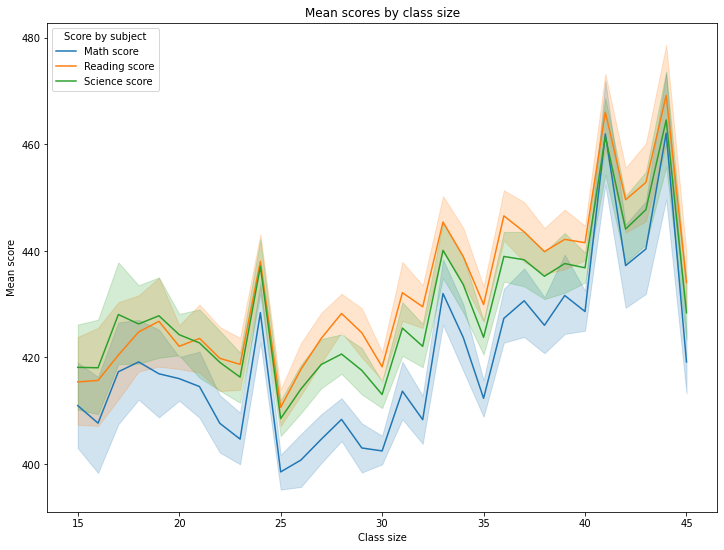

In [67]:
plt.figure(figsize=(12,9))
sb.lineplot(data=df_pisa_class,x='class_size',y='plv_meanmath',label='Math score')
sb.lineplot(data=df_pisa_class,x='class_size',y='plv_meanread',label='Reading score')
sb.lineplot(data=df_pisa_class,x='class_size',y='plv_meanscie',label='Science score')
plt.xlabel('Class size')
plt.ylabel('Mean score')
plt.legend(title='Score by subject', loc=2)
plt.title('Mean scores by class size');

> As we can see on the line plot above the best results correspond to class sizes between 40-45 students, which is a big number and which goes against the logic. However, we can see in the bar plot below that the Chinese Taipei, the country with best results, has the biggest class sizes. This fact is a contradiction against the traditional thinking that smaller class sizes bring better results, hence, higher scores.

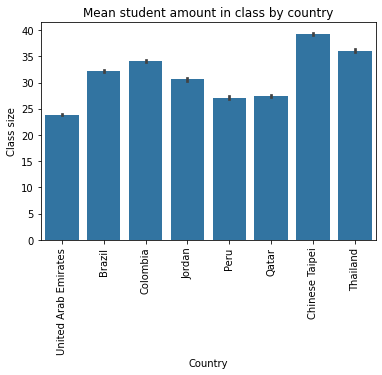

In [68]:
color=sb.color_palette()[0]
ax = sb.barplot(data = df_pisa_noecd, x = 'country', y = 'class_size',color=color)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Class size')
plt.title('Mean student amount in class by country')
plt.show()

# Observed relationships

> Once we made sure that the gender proportion was balanced we have observed that female have better marks in Sience and Reading and male have better marks in Mathematics, even though there is not a big difference.
After this, we have checked if there is any difference between the overall scores of the students born in 1996 and in 1997. As we the only countries that had students born in 1997 were Peru and Thailand we compared just this two countries. The result was, that in both of the the results were better for the older students.

> Another fact is that the Chinese Taipei has the best marks in the three subjects. We have plotted the results for each subject (and the overall score) by country in a box plot and we have also observed that the trend is not only for the Chinese Taipei, it keeps being stable for all the countries, that would have a very similar position in a ranking made by subject for all of them. 


# Surprising facts and interactions

> A very surprising fact is the relationship between the lack of interest of the Chinese Taipei students in Mathematics, which is the highest (45% of *strongly disagree*) and the scores, which are the highest among all the countries analyzed in this report. On the other hand, there is Jordan, which has the highest rate regarding the interest in Maths (*strongly agree* and *agree* percentages) but the corresponding scores are the lowest.

> Another interesting finding is, that the students who do not speak the language of the test at home have better results in all the subjects than those that they do. We also have to mention that the sample of students who speak other language at home is much smaller than the one of the students who speak the exam language at home. 

> Other remarkable results are the high scores corresponding to class sizes between 40-45 students(which is a big number) and which goes against the logic. However, we can see in the bar plot below that the Chinese Taipei, the country with best results, has the biggest class sizes. This fact is a contradiction against the traditional thinking that smaller class sizes bring better results, hence, higher scores.